Welcome! In this notebook we will walk through how to use matplotlib to make legible and exciting looking line graphs! Graphs are a an integeral part of every paper, so make sure yours stand out!

We have 4 key imports:


*   Numpy will allow us to easily work with array data structures and preform useful operations on our data.

*  matplotlib.pyplot allows us to graph our data and the "style" import allows us to costomize the colors and overall look of our graphs.

* scipy stats is a common, but powerful, stats library that will take care of all of our statistical needs!



In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats

First let's generate some mock data. We will have "robot data" and "human data." Consider this data that was gathered during some experiment.

A robot and a human each preformed some task 3 times. We want to plot their average preformance.

In [48]:
# Mock data:
robot_data = np.array([[np.log(i * np.random.uniform(.2, 1)) for i in range(1, 100)],
              [np.log(i * np.random.uniform(.2, 1)) for i in range(1, 100)],
              [np.log(i * np.random.uniform(.2, 1)) for i in range(1, 100)]])
human_data = np.array([[np.log(3*i*np.random.uniform(.2, 1)) for i in range(1, 100)],
              [np.log(3*i*np.random.uniform(.2, 1)) for i in range(1, 100)],
              [np.log(3*i*np.random.uniform(.2, 1)) for i in range(1, 100)]])

print(f"Shape of robot array: {np.shape(robot_data)}")
print(f"Shape of human array: {np.shape(human_data)}")

Shape of robot array: (3, 99)
Shape of human array: (3, 99)


In [49]:
# Calculate averages across 3 trials
robot_data_avg = np.mean(robot_data, 0)
human_data_avg = np.mean(human_data, 0)
print(f"Shape of robot avg array: {np.shape(robot_data_avg)}")
print(f"Shape of human avg array: {np.shape(human_data_avg)}")

Shape of robot avg array: (99,)
Shape of human avg array: (99,)


Let's see how our graph looks if we just plot our data with the defult everything:

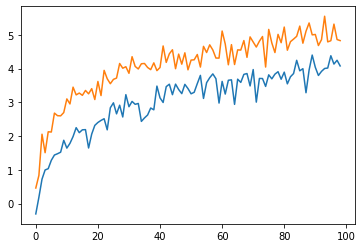

In [50]:
plt.plot(robot_data_avg)
plt.plot(human_data_avg)
plt.show()

Not so great... For one, there are no labels! How will we know what is what... Second, we may want our y-axis to display up to 6 just so their is less white space near the top of the y-axis. Finally, lets just get rid of that top line and the line to the right of the graph as they do not seem to add much. 

In [51]:
# Let's fill an array with the tick labels we want for the y-axis:
yticks = [i for i in range(7)]

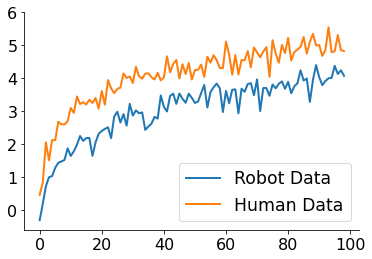

In [52]:
"""
Now that we are doing more costumization, it is good
practice to seperate out the figure and the axis so they are easier to work
with:
"""
fig, ax = plt.subplots() 

# Let's remove those black lines:
right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# Let's plot our data but this time with labels! (and with a thicker line!)
plt.plot(robot_data_avg, label="Robot Data", linewidth=2) 
plt.plot(human_data_avg, label="Human Data", linewidth=2)

# Let's set our y tickmarks and make sure they are legable! 
# (Note: you can set constume x tickmarks in the same way if you want!)
plt.yticks(yticks, fontsize=16) 
plt.xticks(fontsize=16) # Just making everything the same size

# To see the labels, we need a legend! Make sure your legends are big 
# and easy to read! 
plt.legend(fontsize="xx-large")

plt.show()

That is much better! However, we are not done yet! We are still missing axis labels and a title. No problem:

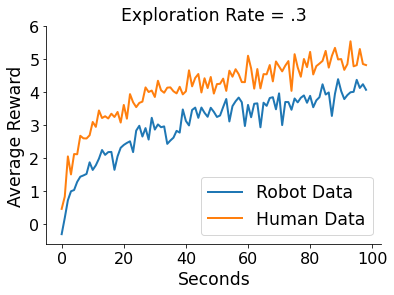

In [53]:
fig, ax = plt.subplots() 

right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)


plt.plot(robot_data_avg, label="Robot", linewidth=2) 
plt.plot(human_data_avg, label="Human", linewidth=2)

plt.yticks(yticks, fontsize=16) 
plt.xticks(fontsize=16) 
 
plt.legend(fontsize="xx-large")

# Here we go:
plt.xlabel("Seconds", fontsize="xx-large")
plt.ylabel("Average Reward", fontsize="xx-large")
plt.title("Exploration Rate = .3", fontsize="xx-large")

plt.show()

Nice! Note that we are making everything quite big. The reason for this is that when you insert your graph into a Latex document, they tend to shrink quite a bit. By using large fonts, we controll for that. 

If however, these are graphs for presentation slides, by all means make the labels a bit smaller.

Though this graph is great, we may also want to visualize standard deviation or error. Let's do that step by step.

In [54]:
# Calculating the standard deviation and standard error of the mean for each "second" of preformance:

robot_stdv = []
human_stdv = []

robot_sem = []
human_sem = []

for i in range(len(robot_data_avg)):
  robot_stdv.append(np.std(robot_data[:, i]))
  human_stdv.append(np.std(human_data[:, i]))

  robot_sem.append(scipy.stats.sem(robot_data[:,i]))
  human_sem.append(scipy.stats.sem(human_data[:,i]))

print(f"Shape of the robot stdv array: {np.shape(robot_stdv)}")

Shape of the robot stdv array: (99,)


So now we have arrays of the standard deviation of rewards *at each second* for both the human and robot. We also have arrays with another common way to visualize error known as the standard error of the mean (or Standard Error).



Let's now visualize our standard deviations on our graph! To do this we will use "plt.errorbar" instead of "plt.plot"

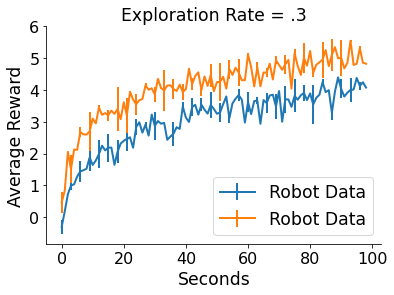

In [62]:
fig, ax = plt.subplots() 

right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)


plt.errorbar([i for i in range(len(robot_data_avg))], robot_data_avg, robot_stdv, label="Robot", linewidth=2, errorevery=3)
plt.errorbar([i for i in range(len(human_data_avg))], human_data_avg, human_stdv, label="Human", linewidth=2, errorevery=3)
# "errorever=3" means it will show the stdv line every 3 seconds. Try to delete that part and see what happens! 
# (It becomes a bit cluttered doesn't it) 

# Note: It is the same thing for the standard error but use the robot_sem and human_sem arrays instead!

plt.yticks(yticks, fontsize=16) 
plt.xticks(fontsize=16) 
 
plt.legend(fontsize="xx-large")

plt.xlabel("Seconds", fontsize="xx-large")
plt.ylabel("Average Reward", fontsize="xx-large")
plt.title("Exploration Rate = .3", fontsize="xx-large")

plt.show()

Another option to visualize standard deviation is with a shaded region. We can do this by "filling" the region between the line and +- its standard deviation. 

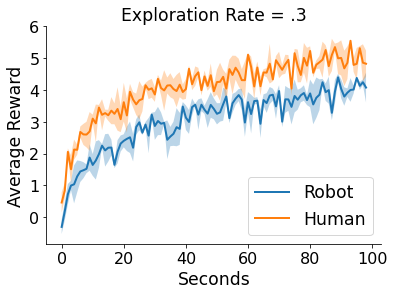

In [65]:
fig, ax = plt.subplots() 

right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

# First we plot the lines:
plt.plot(robot_data_avg, label="Robot", linewidth=2) 
plt.plot(human_data_avg, label="Human", linewidth=2)

# Then we plot the fill
plt.fill_between([i for i in range(len(robot_data_avg))], (robot_data_avg-robot_stdv), (robot_data_avg+robot_stdv), alpha=0.3)
plt.fill_between([i for i in range(len(human_data_avg))], (human_data_avg-human_stdv), (human_data_avg+human_stdv), alpha=0.3)
# Here alpha dicated the opacity of the fill.

plt.yticks(yticks, fontsize=16) 
plt.xticks(fontsize=16) 
 
plt.legend(fontsize="xx-large")

plt.xlabel("Seconds", fontsize="xx-large")
plt.ylabel("Average Reward", fontsize="xx-large")
plt.title("Exploration Rate = .3", fontsize="xx-large")

plt.show()

Almost done, the last thing we are going to do is change our colors a bit! Though our example graph may look good now, the more lines we add it may be difficult for people with diffferent colorblindesses to interperate the graph. Thankfully, pyplot has a built in stlye "seaborn-colorblind" that will take care of this for us. 

If you do not want to use these colors exactly, make sure to check your graph at https://www.color-blindness.com/coblis-color-blindness-simulator/ to make sure it widely legible!

Finally, lets just make one of the lines dashed for fun and save our graph!

In [66]:
style.use("seaborn-colorblind") 

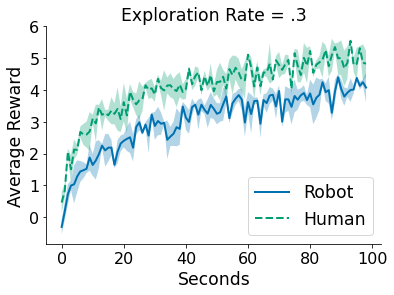

In [68]:
fig, ax = plt.subplots() 

right_side = ax.spines["right"]
top_side = ax.spines["top"]
right_side.set_visible(False)
top_side.set_visible(False)

plt.plot(robot_data_avg, label="Robot", linewidth=2) 
plt.plot(human_data_avg, label="Human", linewidth=2, linestyle='--') # Giving our human a nice dashed line

plt.fill_between([i for i in range(len(robot_data_avg))], (robot_data_avg-robot_stdv), (robot_data_avg+robot_stdv), alpha=0.3)
plt.fill_between([i for i in range(len(human_data_avg))], (human_data_avg-human_stdv), (human_data_avg+human_stdv), alpha=0.3)

plt.yticks(yticks, fontsize=16) 
plt.xticks(fontsize=16) 
 
plt.legend(fontsize="xx-large")

plt.xlabel("Seconds", fontsize="xx-large")
plt.ylabel("Average Reward", fontsize="xx-large")
plt.title("Exploration Rate = .3", fontsize="xx-large")

plt.savefig("diffs_01", bbox_inches="tight") # The bbox_inches="tight" ensures all of our graph is saved!
plt.show()

Admitadely the dashed line does not look great in this context so maybe change it back but, we did it! This graph is now paper ready. 

In this notebook we looked at how to plot line graphs as well as some basic data handling. Check out matplotlibs official documentation and of course stack overflow for more details! 